In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Data input
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [2]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
# 'eval' feature mapping
df['eval'] = df['eval'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

In [4]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
5,vhigh,vhigh,2,2,med,high,0
6,vhigh,vhigh,2,2,big,low,0
7,vhigh,vhigh,2,2,big,med,0
8,vhigh,vhigh,2,2,big,high,0
9,vhigh,vhigh,2,4,small,low,0


In [5]:
print df.shape[0], df.shape[1]

1728 7


In [6]:
num_columns = df.shape[1]
map_dic = {}

# 모든 feature에 대한 mapping (Numerical data 변환)
# Mission 1: 모든 속성들을 수치형 데이터로 변환
for i in feature_names:
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])    

In [7]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [8]:
map_dic

{'buying': {'high': 1, 'low': 3, 'med': 2, 'vhigh': 0},
 'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
 'log_boot': {'big': 2, 'med': 1, 'small': 0},
 'maint': {'high': 1, 'low': 3, 'med': 2, 'vhigh': 0},
 'persons': {'2': 0, '4': 1, 'more': 2},
 'safety': {'high': 2, 'low': 0, 'med': 1}}

In [9]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [10]:
# Data normalization
for i in feature_names:
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)
    df[i] = df[i].map(map_dic_sub)

In [11]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0.000000,0.0,0.0,0.0,0
1,0,0,0.000000,0.0,0.0,0.5,0
2,0,0,0.000000,0.0,0.0,1.0,0
3,0,0,0.000000,0.0,0.5,0.0,0
4,0,0,0.000000,0.0,0.5,0.5,0
5,0,0,0.000000,0.0,0.5,1.0,0
6,0,0,0.000000,0.0,1.0,0.0,0
7,0,0,0.000000,0.0,1.0,0.5,0
8,0,0,0.000000,0.0,1.0,1.0,0
9,0,0,0.000000,0.5,0.0,0.0,0


In [12]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.414931
std,0.372786,0.372786,0.372786,0.408366,0.408366,0.408366,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,0.750000,0.750000,0.750000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
# Mission 2: Target 4개별로 grouping -> 속성별 기본 통계치 및 Box plot 

# Target 별 gorupping
df_unacc = df[df['eval'] == 0]
df_acc = df[df['eval'] == 1]
df_good = df[df['eval'] == 2]
df_vgood = df[df['eval'] == 3]

In [14]:
df_unacc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210
mean,0.450138,0.455647,0.484848,0.395041,0.466116,0.376446,0
std,0.372700,0.375849,0.375717,0.417930,0.409877,0.401382,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
50%,0.333333,0.333333,0.333333,0.500000,0.500000,0.500000,0
75%,0.666667,0.666667,0.666667,1.000000,1.000000,0.500000,0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0


C:\Users\Administrator\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\tools\plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


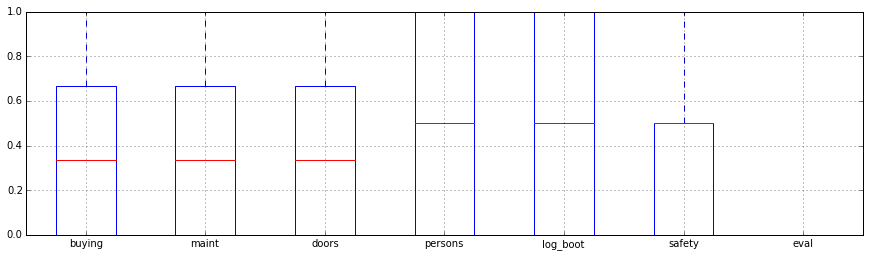

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_unacc.boxplot(ax=ax)
plt.show()

In [16]:
df_acc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384
mean,0.525174,0.530382,0.528646,0.742188,0.550781,0.765625,1
std,0.347318,0.349400,0.364975,0.250204,0.399934,0.249837,0
min,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,1
25%,0.333333,0.333333,0.333333,0.500000,0.000000,0.500000,1
50%,0.666667,0.666667,0.666667,0.500000,0.500000,1.000000,1
75%,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


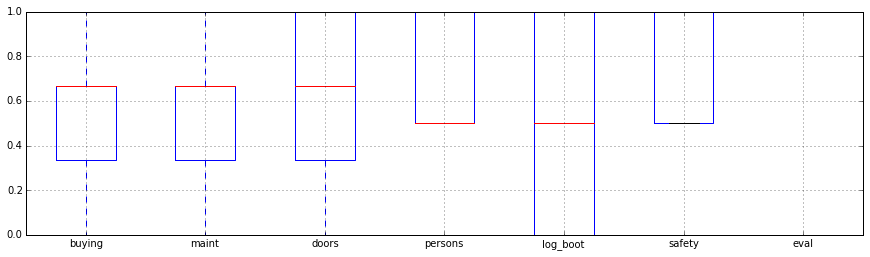

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_acc.boxplot(ax=ax)
plt.show()

In [18]:
df_good.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69
mean,0.888889,0.888889,0.521739,0.739130,0.521739,0.717391,2
std,0.158286,0.158286,0.368171,0.251593,0.406155,0.249680,0
min,0.666667,0.666667,0.000000,0.500000,0.000000,0.500000,2
25%,0.666667,0.666667,0.333333,0.500000,0.000000,0.500000,2
50%,1.000000,1.000000,0.666667,0.500000,0.500000,0.500000,2
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


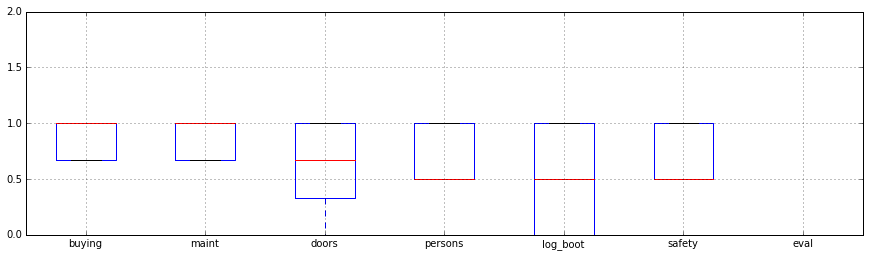

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_good.boxplot(ax=ax)
plt.show()

# 'eval'의 값 때문에 scale이 0.0 ~ 2.0으로 출력되는 것 같아 보임

In [20]:
df_vgood.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,65.000000,65.000000,65.000000,65.000000,65.000000,65,65
mean,0.866667,0.733333,0.589744,0.769231,0.807692,1,3
std,0.164570,0.251385,0.352418,0.251199,0.245145,0,0
min,0.666667,0.333333,0.000000,0.500000,0.500000,1,3
25%,0.666667,0.666667,0.333333,0.500000,0.500000,1,3
50%,1.000000,0.666667,0.666667,1.000000,1.000000,1,3
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1,3
max,1.000000,1.000000,1.000000,1.000000,1.000000,1,3


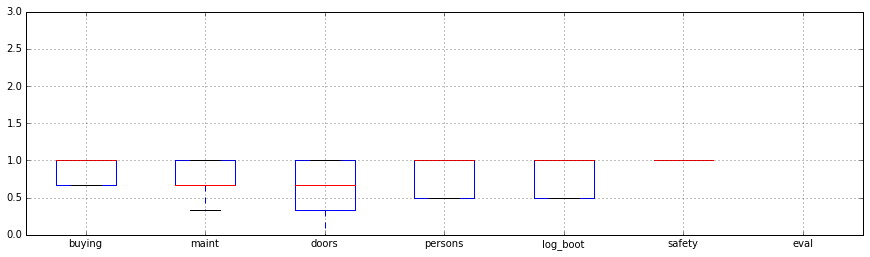

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_vgood.boxplot(ax=ax)
plt.show()

In [22]:
# Data input (scatter plot을 위한 재 정의 -> 위의 df는 normalized value이므로)
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

for i in feature_names:
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])    

In [42]:
feature_names

('buying', 'maint', 'doors', 'persons', 'log_boot', 'safety')

In [54]:
# Mission 3: 속성들을 두 개씩 쌍을 지어 scatter plot
options = {}
for i in range(0, 15):
    options[i] = {}

k = 0;
for i in range(0, 5):
    for j in range(i+1, 6):
        options[k]['data_x'] = feature_names[i]
        options[k]['data_y'] = feature_names[j]
        options[k]['label_x'] = feature_names[i]
        options[k]['label_y'] = feature_names[j]
        options[k]['ylim_min'] = df[feature_names[j]].min() - 0.5
        options[k]['ylim_max'] = df[feature_names[j]].max() + 0.5
        k += 1
options

{0: {'data_x': 'buying',
  'data_y': 'maint',
  'label_x': 'buying',
  'label_y': 'maint',
  'ylim_max': 3.5,
  'ylim_min': -0.5},
 1: {'data_x': 'buying',
  'data_y': 'doors',
  'label_x': 'buying',
  'label_y': 'doors',
  'ylim_max': 3.5,
  'ylim_min': -0.5},
 2: {'data_x': 'buying',
  'data_y': 'persons',
  'label_x': 'buying',
  'label_y': 'persons',
  'ylim_max': 2.5,
  'ylim_min': -0.5},
 3: {'data_x': 'buying',
  'data_y': 'log_boot',
  'label_x': 'buying',
  'label_y': 'log_boot',
  'ylim_max': 2.5,
  'ylim_min': -0.5},
 4: {'data_x': 'buying',
  'data_y': 'safety',
  'label_x': 'buying',
  'label_y': 'safety',
  'ylim_max': 2.5,
  'ylim_min': -0.5},
 5: {'data_x': 'maint',
  'data_y': 'doors',
  'label_x': 'maint',
  'label_y': 'doors',
  'ylim_max': 3.5,
  'ylim_min': -0.5},
 6: {'data_x': 'maint',
  'data_y': 'persons',
  'label_x': 'maint',
  'label_y': 'persons',
  'ylim_max': 2.5,
  'ylim_min': -0.5},
 7: {'data_x': 'maint',
  'data_y': 'log_boot',
  'label_x': 'maint',
 

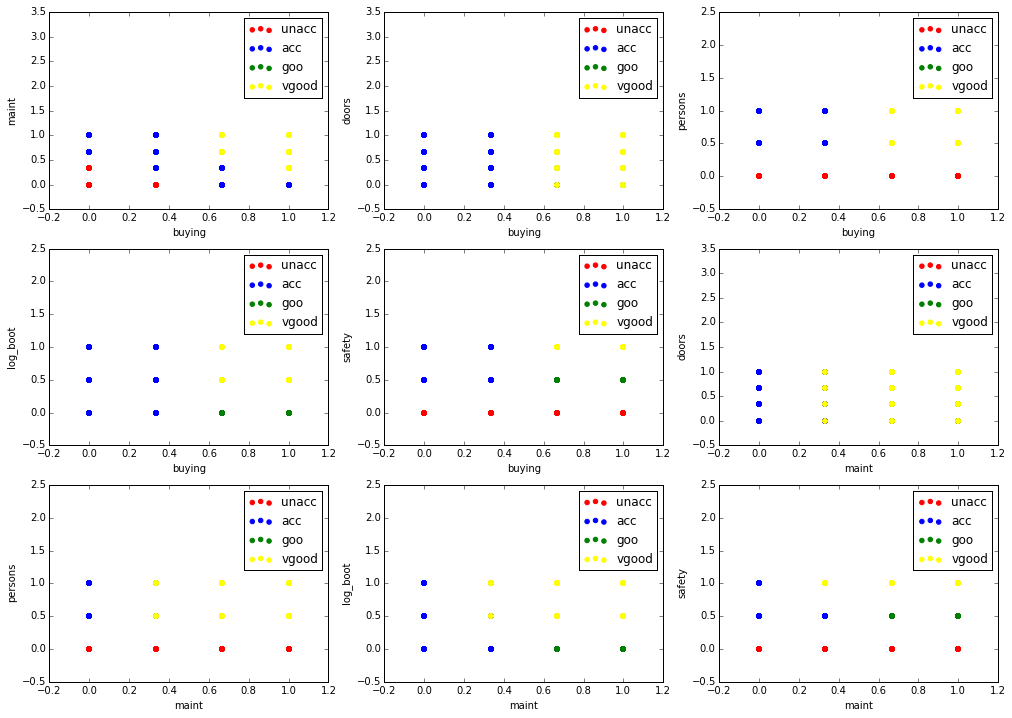

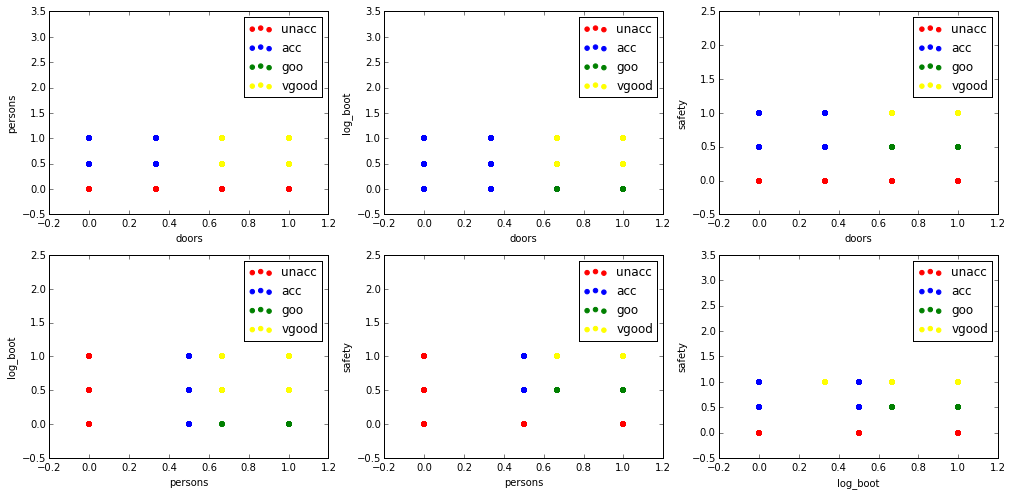

In [55]:
ax = []
fig = plt.figure(figsize = (17, 12))
for i in range(0, 9):
    ax.append(fig.add_subplot(330 + (i+1)))
    
for i in range(0, 9):
    unacc = ax[i].scatter(df_unacc[options[i]['data_x']], df_unacc[options[i]['data_y']], color = 'red')
    acc = ax[i].scatter(df_acc[options[i]['data_x']], df_acc[options[i]['data_y']], color = 'blue')
    good = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i]['data_y']], color = 'green')
    vgood = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i]['data_y']], color = 'yellow')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((unacc, acc, good, vgood), ('unacc', 'acc', 'goo', 'vgood'))

ax = []
fig = plt.figure(figsize = (17, 8))
for i in range(0, 6):
    ax.append(fig.add_subplot(230 + (i+1)))
    
for i in range(0, 6):
    unacc = ax[i].scatter(df_unacc[options[i + 9]['data_x']], df_unacc[options[i + 9]['data_y']], color = 'red')
    acc = ax[i].scatter(df_acc[options[i + 9]['data_x']], df_acc[options[i + 9]['data_y']], color = 'blue')
    good = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i + 9]['data_y']], color = 'green')
    vgood = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i + 9]['data_y']], color = 'yellow')
    ax[i].set_xlabel(options[i + 9]['label_x'])
    ax[i].set_ylabel(options[i + 9]['label_y'])
    ax[i].set_ylim([options[i + 9]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((unacc, acc, good, vgood), ('unacc', 'acc', 'goo', 'vgood'))   

In [ ]:
# Mission 4: Entropy 산출